generated data:
 [0.016591   0.08807477 0.09066909 0.09161012 0.11403158 0.16872682
 0.17366945 0.24091494 0.28864713 0.33216885 0.36112191 0.41058469
 0.7078569  0.77716014 0.96770361 1.1249967  1.30545805 1.38676423
 1.47804685 1.48801498 1.84700494 1.89955589 1.9461351  2.42585893
 3.25054903]
Мода - это все числа, т. к. они все разные
median:
 0.7078569042797094
size:
 3.2339580251421203
assimmetry koefficient:
 1.7071756942971474


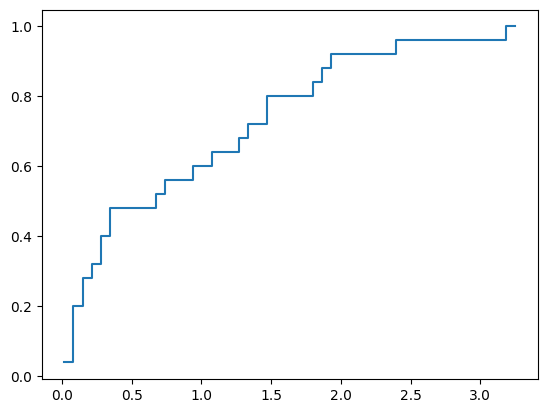

0.9192766279960969

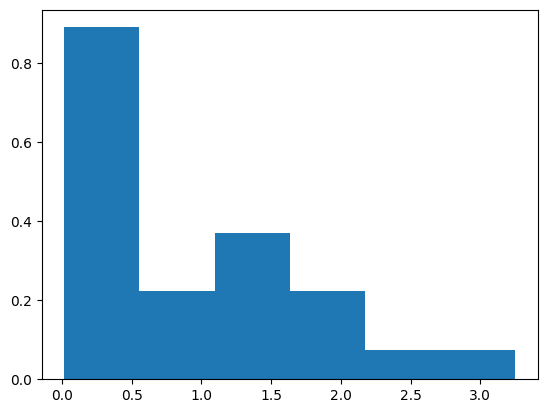

In [ ]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm

random_array = np.random.rand(25)
random_array = -np.log(1 - random_array)
random_array.sort()
print("generated data:\n", random_array)
print("Мода - это все числа, т. к. они все разные")
print("median:\n", np.median(random_array))
size = max(random_array) - min(random_array)
print("size:\n", size)
variance = stats.moment(random_array, 2, center = stats.moment(random_array, 1))
center_moment3 = stats.moment(random_array, 3, center  = stats.moment(random_array, 1))
ass_koef = center_moment3 / (variance ** 1.5)
print("assimmetry koefficient:\n", ass_koef)
ecdf = sm.distributions.ECDF(random_array)


x = np.linspace(min(random_array), max(random_array))
y = ecdf(x)
plt.step(x, y)
plt.show()



N_intervals = 6
interval_range = size / N_intervals

plt.hist(random_array, bins=int(N_intervals), weights=np.ones_like(random_array) / len(random_array) / interval_range)
np.mean(random_array)

<Axes: >

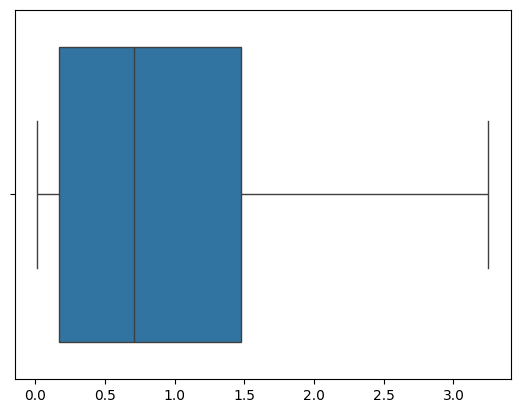

In [ ]:
sns.boxplot(x = random_array)

In [ ]:
def bootstrap(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

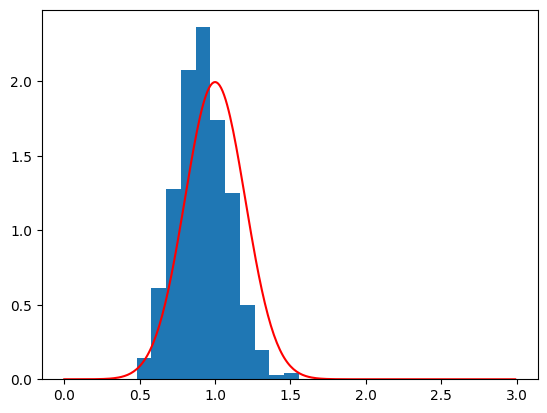

In [ ]:
btstrp = bootstrap(random_array)
btstrp_mean = []
for i in range(1000):
  btstrp_mean.append(btstrp[i].mean())
interval_size = (max(btstrp_mean) - min(btstrp_mean)) / 11
plt.hist(btstrp_mean, bins=11, weights=np.ones_like(btstrp_mean) / len(btstrp_mean) / interval_size)
x = np.arange(0, 3, 0.01)
plt.plot(x, norm.pdf(x, 1, 1/5), color = "red")
plt.show()

(array([0.09972485, 0.30261333, 0.78060484, 0.99724847, 0.73933939,
        0.37138909, 0.11348   , 0.0275103 , 0.00343879, 0.        ,
        0.00343879]),
 array([-0.21294674,  0.0778534 ,  0.36865355,  0.65945369,  0.95025383,
         1.24105398,  1.53185412,  1.82265427,  2.11345441,  2.40425455,
         2.6950547 ,  2.98585484]),
 <BarContainer object of 11 artists>)

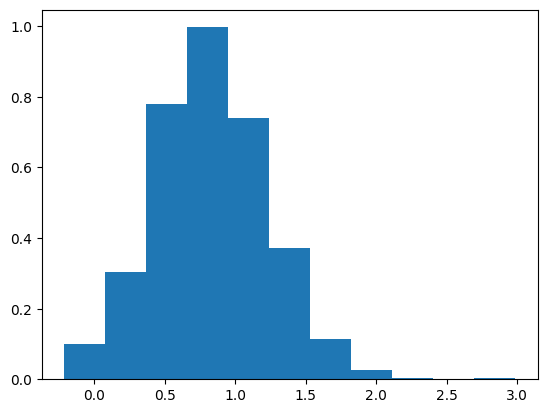

In [ ]:
btstrp = bootstrap(random_array)
btstrp_ass_koef = []
for i in range(1000):
  mean = np.mean(btstrp[i])
  variance = stats.moment(btstrp[i], 2, center = mean)
  center_moment3 = stats.moment(btstrp[i], 3, center = mean)
  ass_koef = center_moment3 / (variance ** 1.5)
  btstrp_ass_koef.append(ass_koef)
interval_size = (max(btstrp_ass_koef) - min(btstrp_ass_koef)) / 11
plt.hist(btstrp_ass_koef, bins=11, weights=np.ones_like(btstrp_ass_koef) / len(btstrp_ass_koef) / interval_size)


<function matplotlib.pyplot.show(close=None, block=None)>

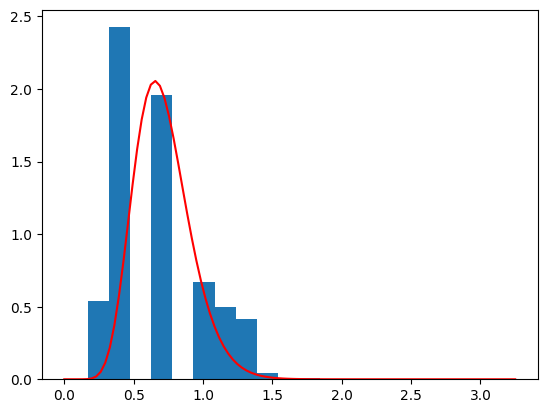

In [ ]:
def x13(x):
  return 25 * 2704156 * np.exp(-13 * x) * (1 - np.exp(-x)) ** 12

btstrp = bootstrap(random_array)
btstrp_med = []
for i in range(1000):
  btstrp_med.append(np.median(btstrp[i]))
interval_size = (max(btstrp_med) - min(btstrp_med)) / 11
x_coord = np.linspace(0, random_array[-1], 100)
y_coord = x13(x_coord)
plt.hist(btstrp_med, bins=11, weights=np.ones_like(btstrp_med) / len(btstrp_med) / interval_size)
plt.plot(x_coord, y_coord, color = "red")
plt.show